In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.special import gamma

In [2]:
def weibull_pdf(x, lam, alpha):
    if lam <= 0 or alpha <= 0:
        raise ValueError("Both lambda (λ) and alpha (α) must be positive.")
    return (alpha / lam) * ((x / lam) ** (alpha - 1)) * np.exp(-((x / lam) ** alpha))

x = np.linspace(0, 10, 100)
lam = 2  #scale parameter
alpha = 1 #shape pearameter

pdf_values = weibull_pdf(x, lam, alpha)

In [3]:
x = np.linspace(0, 10, 100)
lam = 2  #scale parameter
alpha = 2 #shape pearameter

pdf_values = weibull_pdf(x, lam, alpha)

In [4]:
x = np.linspace(0, 10, 100)
lam = 2  #scale parameter
alpha = 3.4 #shape pearameter

pdf_values = weibull_pdf(x, lam, alpha)

In [5]:
def weibull_sigma(alpha):
    if alpha <= 0:
        raise ValueError("Alpha (α) must be positive.")
    return np.exp(-alpha)

def modified_weibull_pdf(x, lam, sigma):
    if lam <= 0 or not (0 < sigma < 1):
        raise ValueError("Lambda (λ) must be positive and 0 < σ < 1.")
    
    ln_sigma = -np.log(sigma)
    return (ln_sigma / lam) * ((x / lam) ** (ln_sigma - 1)) * np.exp(-((x / lam) ** ln_sigma))

alpha = 1.5
sigma = weibull_sigma(alpha)
lam = 2 
x = np.linspace(0.1, 10, 100)

pdf_values = modified_weibull_pdf(x, lam, sigma)

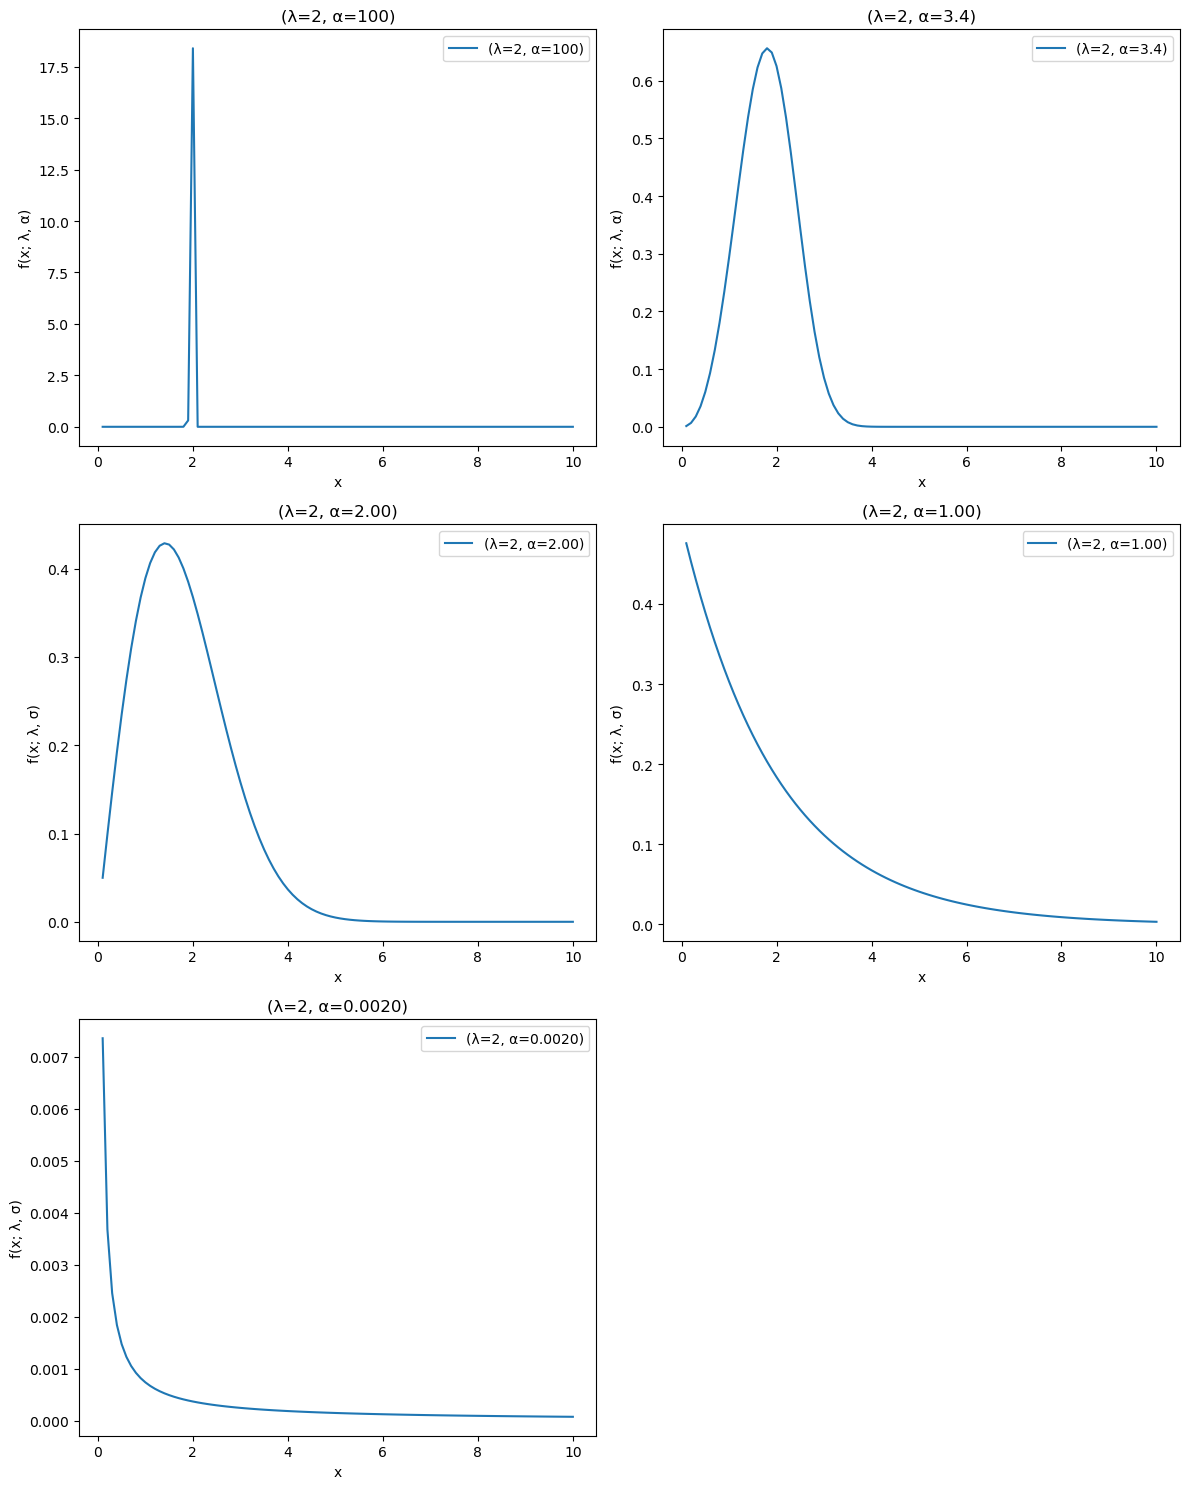

In [6]:
lam = 2
alpha1 = 100
alpha2 = 3.4
alpha3 = 2
alpha4 = 1
alpha5 = 0.002
x = np.linspace(0.1, 10, 100)

pdf_values1 = weibull_pdf(x, lam, alpha1)
pdf_values2 = weibull_pdf(x, lam, alpha2)
pdf_values3 = weibull_pdf(x, lam, alpha3)
pdf_values4 = weibull_pdf(x, lam, alpha4)
pdf_values5 = weibull_pdf(x, lam, alpha5)

fig, axs = plt.subplots(3, 2, figsize=(12, 15))

axs[0, 0].plot(x, pdf_values1, label=f"(λ={lam}, α={alpha1})")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("f(x; λ, α)")
axs[0, 0].set_title(f"(λ={lam}, α={alpha1})")
axs[0, 0].legend()

axs[0, 1].plot(x, pdf_values2, label=f"(λ={lam}, α={alpha2})")
axs[0, 1].set_xlabel("x")
axs[0, 1].set_ylabel("f(x; λ, α)")
axs[0, 1].set_title(f"(λ={lam}, α={alpha2})")
axs[0, 1].legend()

axs[1, 0].plot(x, pdf_values3, label=f"(λ={lam}, α={alpha3:.2f})")
axs[1, 0].set_xlabel("x")
axs[1, 0].set_ylabel("f(x; λ, σ)")
axs[1, 0].set_title(f"(λ={lam}, α={alpha3:.2f})")
axs[1, 0].legend()

axs[1, 1].plot(x, pdf_values4, label=f"(λ={lam}, α={alpha4:.2f})")
axs[1, 1].set_xlabel("x")
axs[1, 1].set_ylabel("f(x; λ, σ)")
axs[1, 1].set_title(f"(λ={lam}, α={alpha4:.2f})")
axs[1, 1].legend()

axs[2, 0].plot(x, pdf_values5, label=f"(λ={lam}, α={alpha5:.4f})")
axs[2, 0].set_xlabel("x")
axs[2, 0].set_ylabel("f(x; λ, σ)")
axs[2, 0].set_title(f"(λ={lam}, α={alpha5:.4f})")
axs[2, 0].legend()

fig.delaxes(axs[2, 1])

plt.tight_layout()

plt.show()

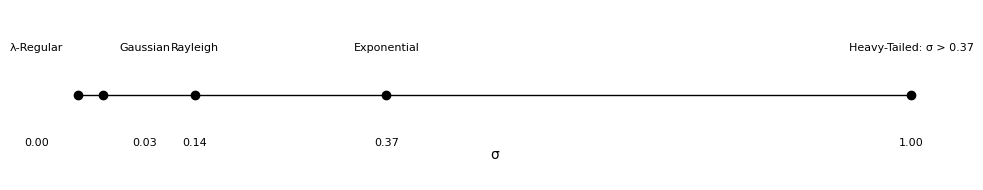

In [7]:
sigma_values = [0, 0.03, 0.14, 0.37, 1]
labels = ["λ-Regular", "Gaussian", "Rayleigh", "Exponential", "Heavy-Tailed: σ > 0.37"]

fig, ax = plt.subplots(figsize=(10, 2))
ax.hlines(y=0, xmin=0, xmax=1, color='black', linewidth=1)

for i, (sigma, label) in enumerate(zip(sigma_values, labels)):
    ax.plot(sigma, 0, 'o', color='black')
    
    if label == "λ-Regular":
        ax.text(sigma - 0.05, 0.1, label, ha='center', fontsize=8, va='bottom')
    elif label == "Gaussian":
        ax.text(sigma + 0.05, 0.1, label, ha='center', fontsize=8, va='bottom')
    else:
        ax.text(sigma, 0.1, label, ha='center', fontsize=8, va='bottom') 

    if label == "λ-Regular":
        ax.text(sigma - 0.05, -0.1, f'{sigma:.2f}', ha='center', fontsize=8, va='top')
    elif label == "Gaussian":
        ax.text(sigma + 0.05, -0.1, f'{sigma:.2f}', ha='center', fontsize=8, va='top')
    else:
        ax.text(sigma, -0.1, f'{sigma:.2f}', ha='center', fontsize=8, va='top') 

ax.set_xlim(-0.05, 1.05) 
ax.set_ylim(-0.2, 0.2) 
ax.axis('off')         

ax.text(0.5, -0.15, "σ", fontsize=10, ha='center') 

plt.tight_layout()
plt.show()

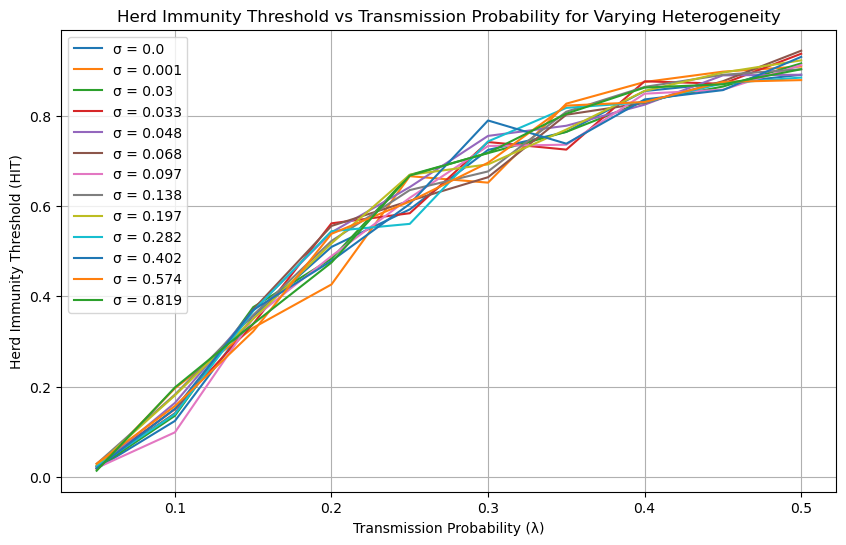

In [8]:
def sir_model(graph, tau, gamma, initial_infected, num_steps):
    N = len(graph)
    S = [1] * N 
    I = [0] * N 
    R = [0] * N

    I[initial_infected] = 1 
    S[initial_infected] = 0 

    S_history = [sum(S)]
    I_history = [sum(I)]
    R_history = [sum(R)]

    for step in range(num_steps):
        new_infected = []
        new_recovered = []
        
        for node in range(N):
            if I[node] == 1:
                for neighbor in graph.neighbors(node):
                    if S[neighbor] == 1 and np.random.rand() < tau:
                        new_infected.append(neighbor)
                
                if np.random.rand() < gamma:
                    new_recovered.append(node)
        
        for node in new_infected:
            I[node] = 1
            S[node] = 0
        for node in new_recovered:
            I[node] = 0
            R[node] = 1

        S_history.append(sum(S))
        I_history.append(sum(I))
        R_history.append(sum(R))

        if np.abs(sum(new_infected) - sum(new_recovered)) < 0.01:
            break
    
    HIT = (sum(I) + sum(R)) / N
    return HIT

def create_graph(N, sigma):
    G = nx.erdos_renyi_graph(N, 0.05)
    for node in G.nodes:
        if np.random.rand() < sigma:
            neighbors = list(G.neighbors(node))
            if neighbors: 
                neighbor = np.random.choice(neighbors)
                G.add_edge(node, neighbor)
    return G

gamma = 0.1 
N = 100
initial_infected = 0
num_steps = 200
landa = 5 

sigma_values = [0.0, 0.001, 0.03, 0.033, 0.048, 0.068, 0.097, 0.138, 0.197, 0.282, 0.402, 0.574, 0.819]

num_simulations = 150

hit_values = []

tau_values = np.linspace(0.05, 0.5, 10)

for sigma in sigma_values:
    HITs = [] 
    
    for tau in tau_values:
        hits_for_tau = []  
        for _ in range(num_simulations):
            graph = create_graph(N, sigma) 
            HIT = sir_model(graph, tau, gamma, initial_infected, num_steps)
            hits_for_tau.append(HIT)
        
        avg_HIT = np.mean(hits_for_tau)
        HITs.append(avg_HIT)
    
    hit_values.append(HITs)

plt.figure(figsize=(10, 6))

for i, sigma in enumerate(sigma_values):
    plt.plot(tau_values, hit_values[i], label=f"σ = {sigma}")

plt.xlabel('Transmission Probability (λ)')
plt.ylabel('Herd Immunity Threshold (HIT)')
plt.title('Herd Immunity Threshold vs Transmission Probability for Varying Heterogeneity')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from scipy.special import gamma as gamma_function

def mean_degree(lam, sigma):
    ln_sigma = np.log(sigma)
    if ln_sigma == 0:
        raise ValueError("Logarithm of sigma is zero, resulting in division by zero.")
    exponent = -1 / ln_sigma + 1
    return lam * gamma_function(exponent)

def second_moment_degree(lam, sigma):
    ln_sigma = np.log(sigma)
    if ln_sigma == 0: 
        raise ValueError("Logarithm of sigma is zero, resulting in division by zero.")
    
    term1_exponent = -2 / ln_sigma + 1
    term1 = lam**2 * gamma_function(term1_exponent)
    
    term2_exponent = -1 / ln_sigma + 1
    term2 = lam**2 * (gamma_function(term2_exponent)**2)
    
    return term1 - term2

def kappa_theory_from_formula(sigma):

    ln_sigma = np.log(sigma)
    if ln_sigma == 0:  # Handle log(1) = 0 case
        raise ValueError("Logarithm of sigma is zero, resulting in division by zero.")
    
    gamma_minus2 = gamma_function(-2 / ln_sigma + 1)
    gamma_minus1 = gamma_function(-1 / ln_sigma + 1)
    
    numerator = gamma_minus2 - gamma_minus1**2
    denominator = gamma_minus1
    
    return numerator / denominator

lambda_value = 1.0
sigma_values = [0.1, 0.2, 0.5, 0.8]

print(f"{'σ':<6}{'<k>':<12}{'<k^2>':<12}{'<k^2>/<k>':<14}{'κ_theory':<14}{'Difference':<14}")

for sigma in sigma_values:
    try:
        k_mean = mean_degree(lambda_value, sigma)
        k2_mean = second_moment_degree(lambda_value, sigma)
        
        kappa_ratio = k2_mean / k_mean
        kappa_formula = kappa_theory_from_formula(sigma)
        
        difference = np.abs(kappa_ratio - kappa_formula)
        
        print(f"{sigma:<6.2f}{k_mean:<12.4f}{k2_mean:<12.4f}{kappa_ratio:<14.4f}{kappa_formula:<14.4f}{difference:<14.4e}")
    except Exception as e:
        print(f"{sigma:<6.2f}Error: {str(e)}")


σ     <k>         <k^2>       <k^2>/<k>     κ_theory      Difference    
0.10  0.8859      0.1665      0.1880        0.1880        0.0000e+00    
0.20  0.8961      0.3253      0.3630        0.3630        0.0000e+00    
0.50  1.2779      3.5723      2.7955        2.7955        0.0000e+00    
0.80  50.8009     331195.3331 6519.4749     6519.4749     0.0000e+00    


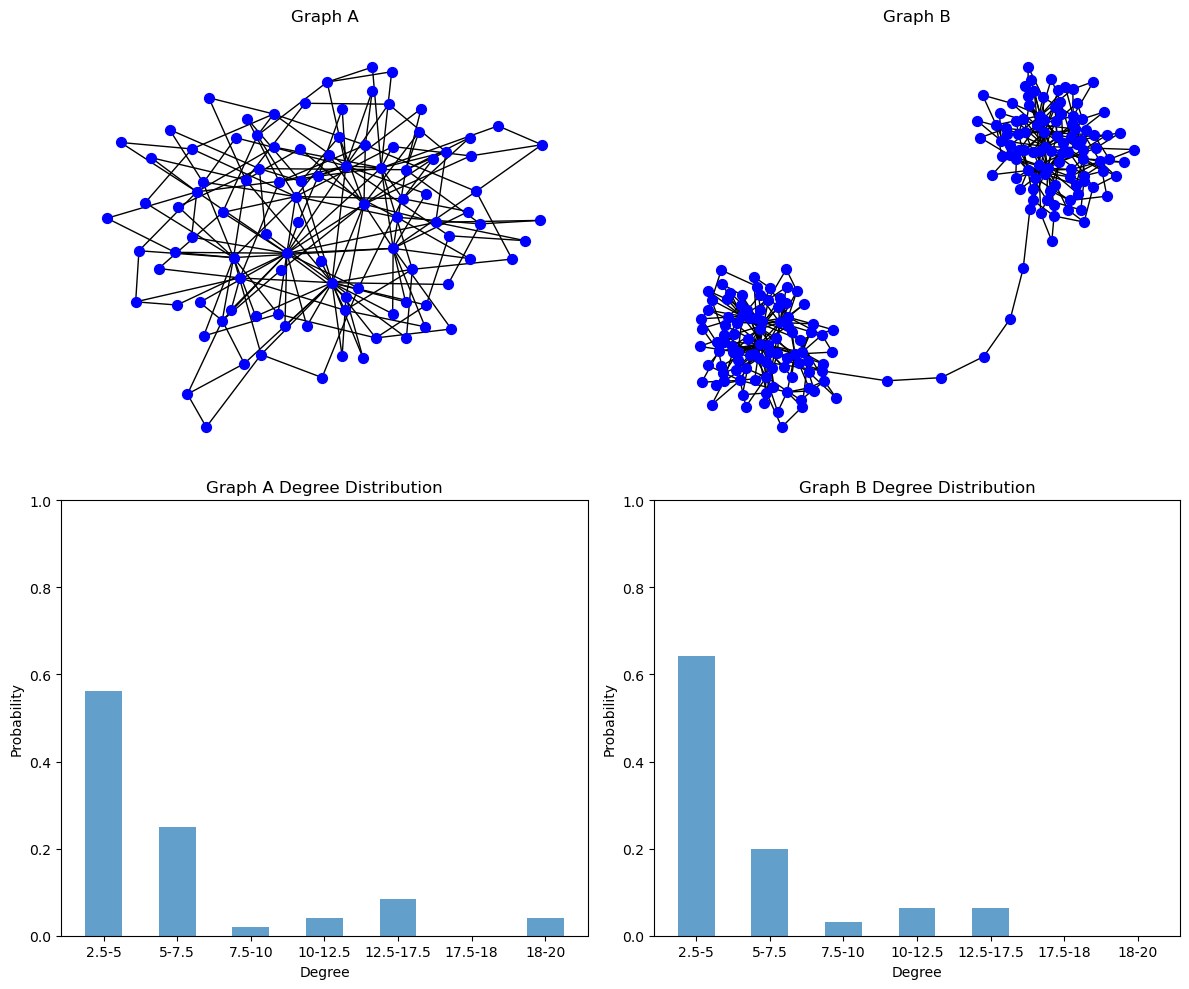

In [10]:
def calculate_and_plot_distribution(graph, ax, title, bins, labels):
    degrees = [degree for _, degree in graph.degree()]
    hist, bin_edges = np.histogram(degrees, bins=bins)
    probabilities = hist / sum(hist)

    ax.bar(
        labels, probabilities, width=0.5, align="center", alpha=0.7
    )
    ax.set_title(title)
    ax.set_xlabel("Degree")
    ax.set_ylabel("Probability")
    ax.set_ylim(0, 1)

graph_a = nx.barabasi_albert_graph(100, 2)

graph_b1 = nx.barabasi_albert_graph(100, 2)
graph_b2 = nx.barabasi_albert_graph(100, 2)

path_length = 5
path_graph = nx.path_graph(path_length)

mapping_b2 = {node: node + len(graph_b1) for node in graph_b2.nodes}
graph_b2 = nx.relabel_nodes(graph_b2, mapping_b2)

mapping_path = {node: node + len(graph_b1) + len(graph_b2) for node in path_graph.nodes}
path_graph = nx.relabel_nodes(path_graph, mapping_path)

graph_b = nx.compose(graph_b1, graph_b2)
graph_b = nx.compose(graph_b, path_graph)

graph_b.add_edge(list(graph_b1.nodes)[-1], list(path_graph.nodes)[0])
graph_b.add_edge(list(graph_b2.nodes)[-1], list(path_graph.nodes)[-1])

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

nx.draw(graph_a, ax=ax[0, 0], node_color='blue', node_size=50, with_labels=False)
ax[0, 0].set_title("Graph A")

nx.draw(graph_b, ax=ax[0, 1], node_color='blue', node_size=50, with_labels=False)
ax[0, 1].set_title("Graph B")

bins = [2.5, 5, 7.5, 10, 12.5, 17.5, 18, 20]
labels = [
    "2.5-5",
    "5-7.5",
    "7.5-10",
    "10-12.5",
    "12.5-17.5",
    "17.5-18",
    "18-20",
]

calculate_and_plot_distribution(graph_a, ax[1, 0], "Graph A Degree Distribution", bins, labels)

calculate_and_plot_distribution(graph_b, ax[1, 1], "Graph B Degree Distribution", bins, labels)

plt.tight_layout()
plt.show()